# Interactive plots using Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Time series plot with error bands

* Functional magentic resonance imaging (fMRI)
* Measures brain activity using a strong, static magnetic field to detect changes associated with blood flow
* High-amplitude signals indicate strong neural activity

In [2]:
# Load data
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


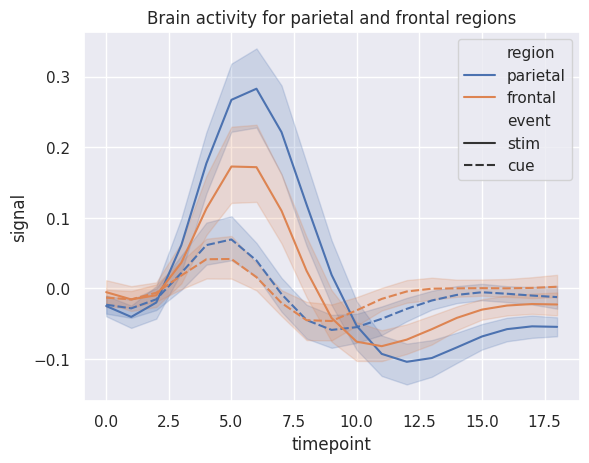

In [3]:
# Plot the responses
sns.set_theme(style="darkgrid")
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
             data=fmri)
plt.title("Brain activity for parietal and frontal regions")
plt.show()

### Scatterplot with continuous hues and sizes

In [4]:
# Load data
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


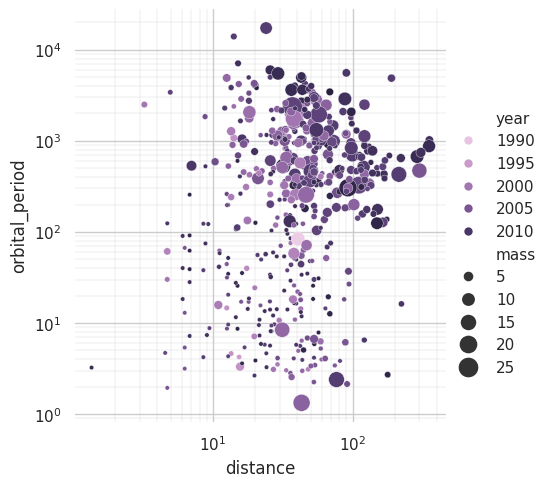

In [5]:
# Plot distance against orbital_period
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=0.2,
                             as_cmap=True)
g = sns.relplot(data=planets,
                x="distance",
                y="orbital_period",
                hue="year",
                size="mass",
                palette=cmap,
                sizes=(10, 200))
g.set(xscale="log",     
      yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=0.25)
g.ax.yaxis.grid(True, "minor", linewidth=0.25)
g.despine(left=True, bottom=True)
plt.show()

### Small multiple time series

In [6]:
# Load data
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


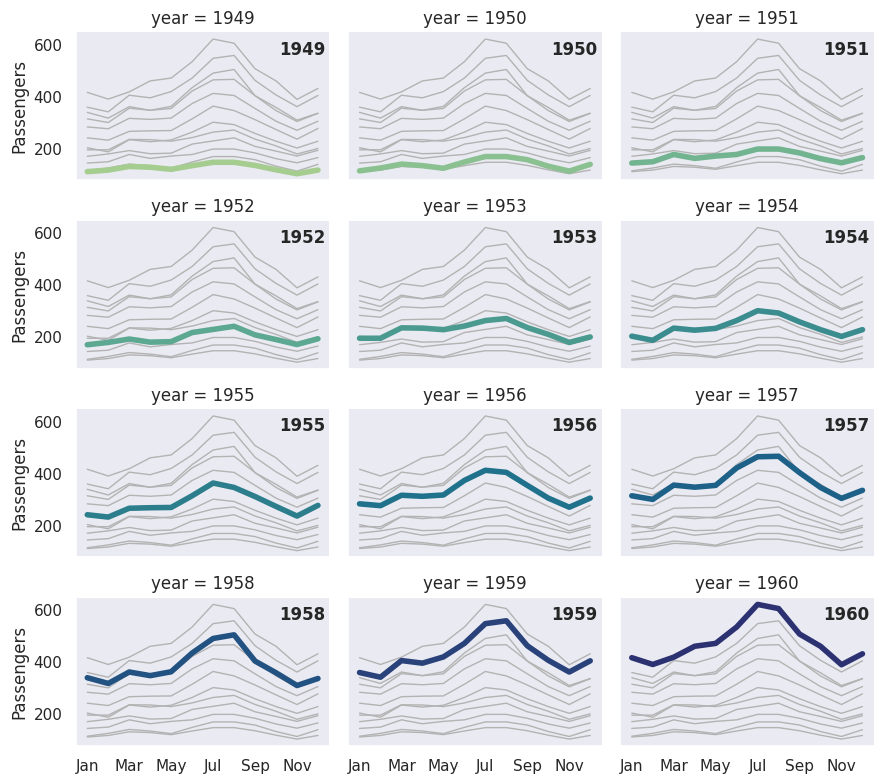

In [7]:
# Plot each year's time series in its own facet
sns.set_theme(style="dark")
g = sns.relplot(data=flights,
                x="month",
                y="passengers",
                col="year",
                hue="year",
                kind="line",
                palette="crest",
                linewidth=4,
                zorder=5,
                col_wrap=3,
                height=2,
                aspect=1.5,
                legend=False)

# Customize each subplot
for year, ax in g.axes_dict.items():
    
    # Add chart titles
    ax.text(x=0.8,
            y=0.85,
            s=year,
            transform=ax.transAxes,
            fontweight="bold")
    
    # Plot each year's timeseries
    sns.lineplot(
        data=flights,
        x="month",
        y="passengers",
        units="year",
        estimator=None,
        color="0.7",
        linewidth=1,
        ax=ax
    )

# Customise each plot
ax.set_xticks(ax.get_xticks()[::2])
g.set_axis_labels("", "Passengers")
g.tight_layout()
plt.show()

### Horizontal boxplot with observations

/tmp/ipykernel_1506/2538210291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="distance",


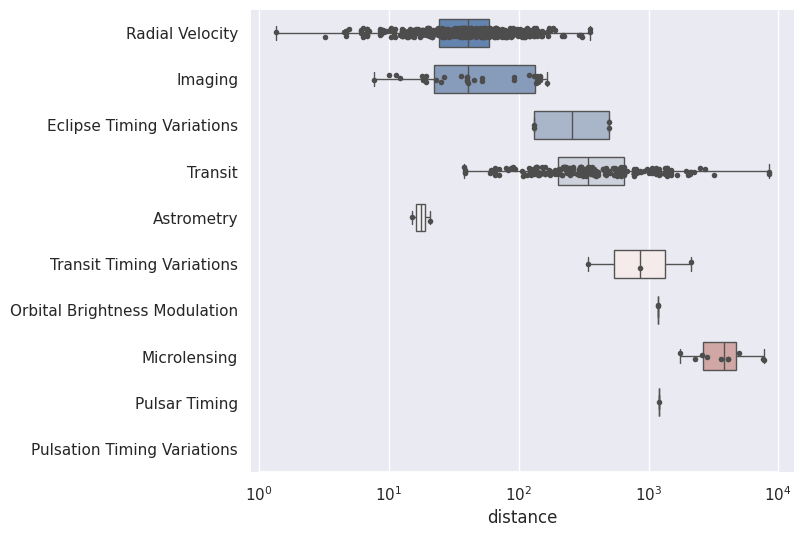

In [8]:
# Use logarithmic x-axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot orbital_period with horizontal boxes
sns.boxplot(x="distance",
            y="method",
            data=planets,
            whis=[0, 100],
            width=0.6,
            palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance",
              y="method",
              data=planets,
              size=4,
              color="0.3",
              linewidth=0)

# Customize chart
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True,
            left=True)

### Linear Regression with marginal distributions

In [9]:
# Load data
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


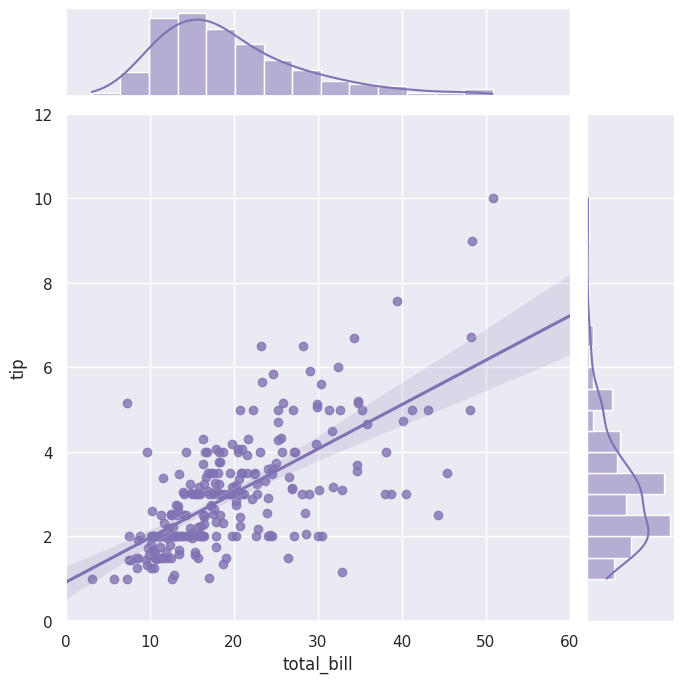

In [10]:
# Plot bivariate and univariate graphs
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="total_bill",
                  y="tip",
                  data=tips,
                  kind="reg",
                  truncate=False,
                  xlim=(0, 60),
                  ylim=(0, 12),
                  color="m",
                  height=7)
plt.show()

### Scatterplot with varying point sizes and hues

In [11]:
# Load data
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


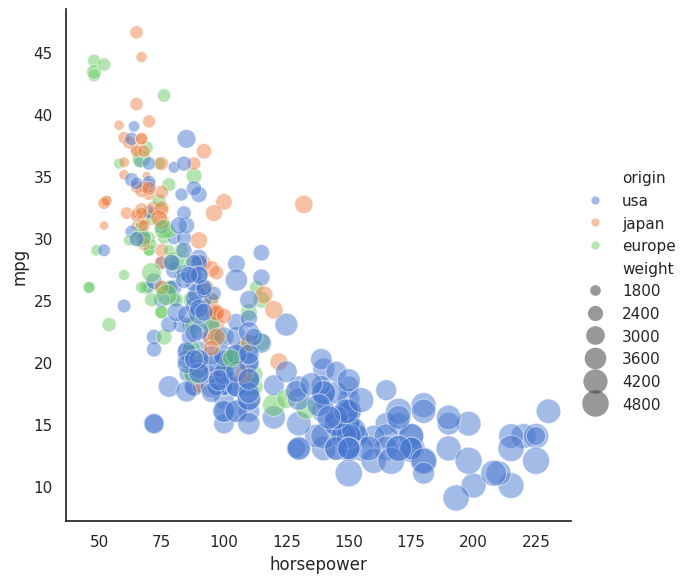

In [12]:
# Plot miles per gallon against horsepower
sns.set_theme(style="white")
sns.relplot(x="horsepower",
            y="mpg",
            hue="origin",
            size="weight",
            sizes=(40, 400),
            alpha=0.5,
            palette="muted",
            height=6,
            data=mpg)
plt.show()

### Scatterplot with categorical variables

In [13]:
# Load data
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


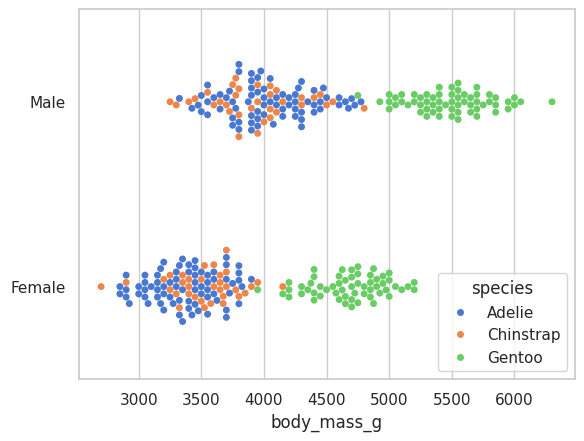

In [14]:
# Plot categorical scatterplot of each observation
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.swarmplot(data=penguins,
                   x="body_mass_g",
                   y="sex",
                   hue="species")
ax.set(ylabel="")
plt.show()

### Violinplots

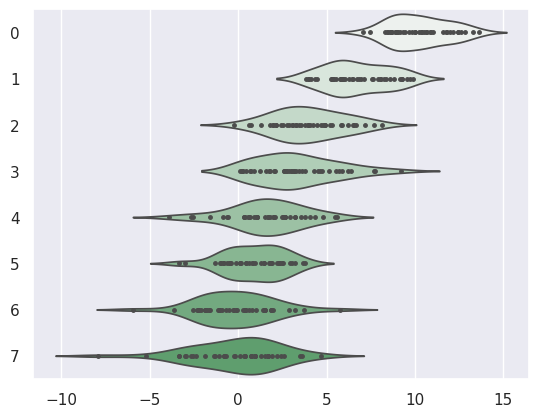

In [15]:
# Generate random dataset
rs = np.random.default_rng(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p+1)) * -5 + 10

# Plot violin and points
sns.set_theme()
sns.violinplot(data=d,
               palette="light:g",
               inner="points",
               orient="h")
plt.show()

### Smooth kernel density with marginal histograms

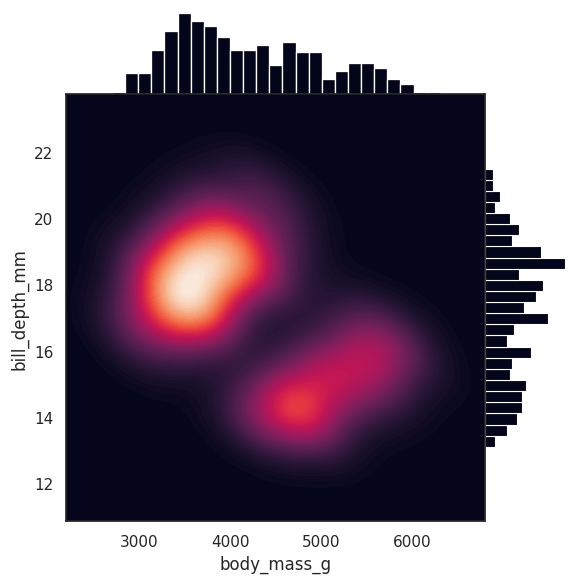

In [16]:
# Plot bivariate KDE and univariate histograms 
sns.set_theme(style="white")
g = sns.JointGrid(data=penguins,
                  x="body_mass_g",
                  y="bill_depth_mm",
                  space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             clip=((2200, 6800), (10, 25)),
             thresh=0,
             levels=100,
             cmap="rocket")
g.plot_marginals(sns.histplot,
                 color="#03051A",
                 alpha=1,
                 bins=25)
plt.show()

### Annotated heatmaps

In [17]:
# Load dataset 
flights_long = sns.load_dataset("flights")
flights_long.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [18]:
# Convert to wide format
flights = flights_long.pivot(index="month",
                             columns="year",
                             values="passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


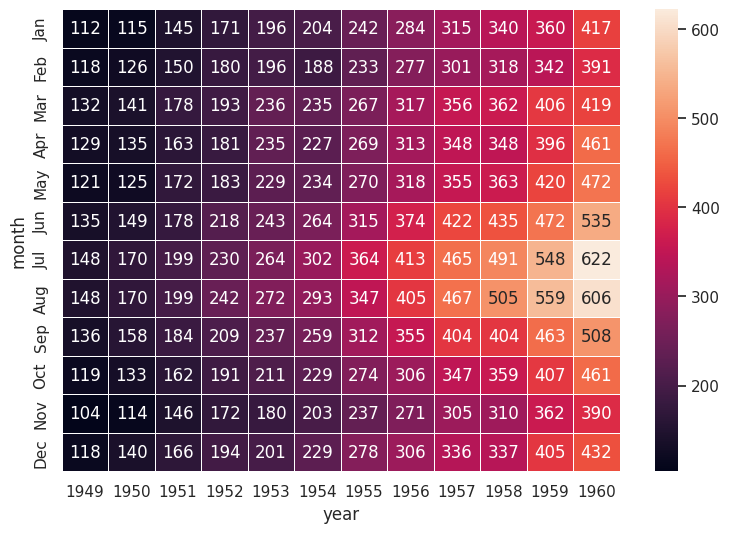

In [19]:
# Draw heatmap with number of passengers in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights,
            annot=True,
            fmt="d",
            linewidth=0.5,
            ax=ax)
plt.show()

### Plotting large distributions

* Boxenplots are also known as letter-value plots
* Better than boxplots for large datasets
* Classic boxplots have too many outliers and do not show as much information about the distribution
* Centreline is the median value (Q2)
* First two areas above and below the median contain 50% of the data
* Next two areas further away fro the centreline contian 25% of the data
* This continues until we reach the outlier level
* Each level out is shaded lighter 

In [20]:
# Load data
diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS1", "VVS2", "IF"]
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/tmp/ipykernel_1506/1986880400.py:1: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x="clarity",


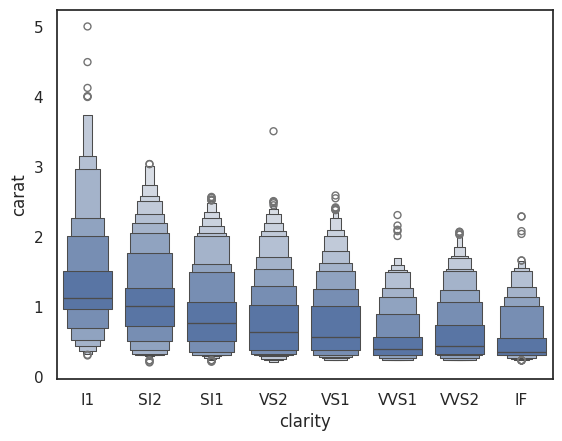

In [21]:
sns.boxenplot(x="clarity",
              y="carat",
              color="b",
              order=clarity_ranking,
              scale="linear",
              data=diamonds)
plt.show()

### Stacked histogram on a log scale